In [14]:
"""
================================
        Data pre-processing
  transitory regimes correction
================================

(See the project documentation for more info)

The goal is to process data before using it to train ML algorithms :
- Extraction of accelerations
- Transitory regimes suppression on activity 1
"""
print(__doc__)


        Data pre-processing
  transitory regimes correction

(See the project documentation for more info)

The goal is to process data before using it to train ML algorithms :
- Extraction of accelerations
- Transitory regimes suppression on activity 1



In [15]:
# Imports statements

import pandas as pd
import numpy as np
# from math import cos, sin
from utils.colorpalette import black, red, blue, green, yellow, pink, brown, violet
from utils.activities import activities_labels
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [16]:
# Import data into memory

raw_data = pd.read_csv('../data/1.csv',header=None,delimiter=',').astype(int)
raw_data.head()

,0,1,2,3,4
0,0,1502,2215,2153,1
1,1,1667,2072,2047,1
2,2,1611,1957,1906,1
3,3,1601,1939,1831,1
4,4,1643,1965,1879,1


In [17]:
# Prepare further plotting activities
color_map = np.array([black, red, blue, green, yellow, pink, brown, violet])
axe_name = ['X', 'Y', 'Z']
activities = np.array(raw_data[4]-1) # -1 is here to shift the table correctly to work with the color_map
x_min, x_max = raw_data[0].min() - 1, raw_data[0].max() + 1

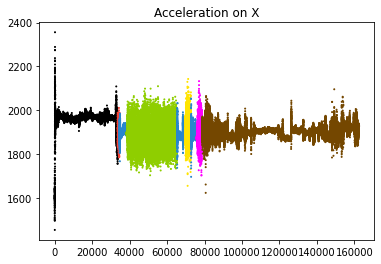

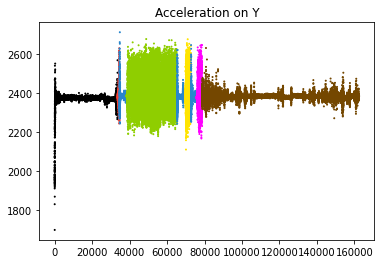

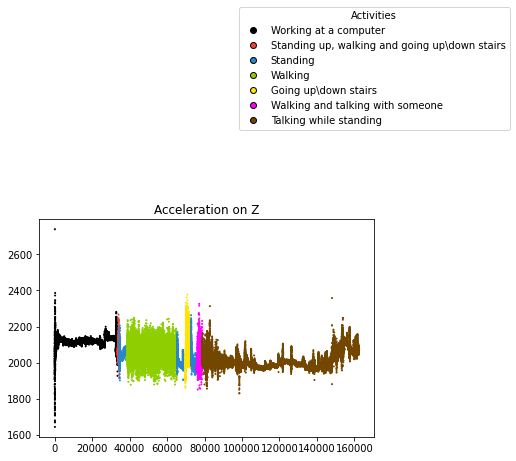

In [9]:
# Show data before processing
y_min, y_max, xx, yy, fig, subplot  = [], [], [], [], [], []
legend = []
for activity, color in zip(activities_labels, color_map):
    legend.append(Line2D([0], [0], marker='o', label=activity, ls='None', markerfacecolor=color, markeredgecolor='k'))
for k in range(0,3):
    y_min.append(raw_data[k+1].min() - 1)
    y_max.append(raw_data[k+1].max() + 1)
    xx_tmp, yy_tmp = np.meshgrid(np.arange(x_min, x_max, 1000),np.arange(y_min[k], y_max[k], 100))
    xx.append(xx_tmp)
    yy.append(yy_tmp)
    fig.append(plt.figure())
    subplot.append(fig[k].add_subplot(111))
    subplot[k].scatter(raw_data[0], raw_data[k+1], s=1,c=color_map[activities])
    subplot[k].set_title('Acceleration on ' + axe_name[k])
legend = plt.legend(handles=legend, loc='upper center', bbox_to_anchor=(1, 2), title='Activities')
plt.show()

In [10]:
#Prepare for processing
clean_data = []

In [11]:
# Transitory regime suppression on activity 1
np_raw_data = np.array(raw_data, dtype=object)
bool_mask_on_act_1 = np_raw_data[:, 4] == 1 # Boolean mask to only select rows concerning activity 1
bool_mask_on_act_1_permanent_regime = (np_raw_data[:, 0] >= 400) & (np_raw_data[:, 0] <= 32000) # Boolean mask to only select rows from 400 to 3200
act_1_data_permanent_regime = np_raw_data[bool_mask_on_act_1 & bool_mask_on_act_1_permanent_regime] # Applying masks to filter raw_data
bool_mask_on_other_activities = np_raw_data[:, 4] != 1 # Boolean mask to only select rows concerning not activity 1
other_act_data = np_raw_data[bool_mask_on_other_activities]

clean_data = np.concatenate((act_1_data_permanent_regime, other_act_data), axis=0)

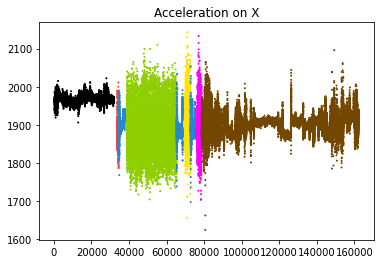

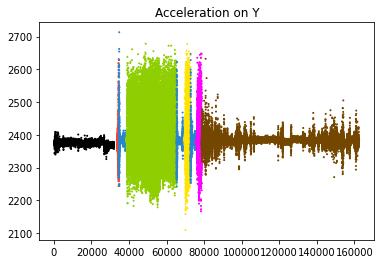

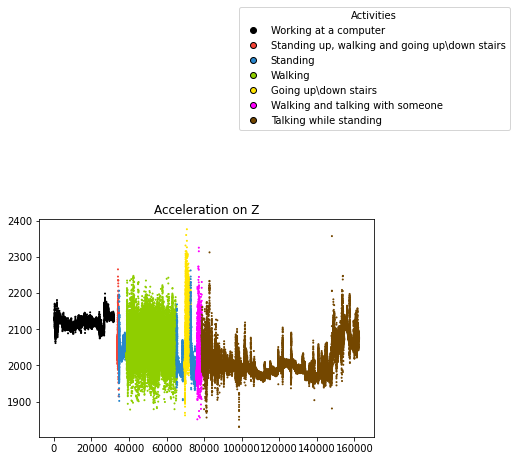

In [12]:
# Show activity 1 data after transitory regime suppression on activity 1
activities = np.array(clean_data[:,4]-1, dtype=int) # -1 is here to shift the table correctly to work with the color_map

x_min, x_max = clean_data[0].min() - 1, clean_data[0].max() + 1
y_min, y_max, xx, yy, fig, subplot  = [], [], [], [], [], []
legend = []
for activity, color in zip(activities_labels, color_map):
    legend.append(Line2D([0], [0], marker='o', label=activity, ls='None', markerfacecolor=color, markeredgecolor='k'))
for k in range(0,3):
    y_min.append(clean_data[k+1].min() - 1)
    y_max.append(clean_data[k+1].max() + 1)
    xx_tmp, yy_tmp = np.meshgrid(np.arange(x_min, x_max, 1000),np.arange(y_min[k], y_max[k], 100))
    xx.append(xx_tmp)
    yy.append(yy_tmp)
    fig.append(plt.figure())
    subplot.append(fig[k].add_subplot(111))
    subplot[k].scatter(clean_data[:,0], clean_data[:,k+1], s=1,c=color_map[activities])
    subplot[k].set_title('Acceleration on ' + axe_name[k])
legend = plt.legend(handles=legend, loc='upper center', bbox_to_anchor=(1, 2), title='Activities')
plt.show()

In [13]:
# Push data changes into new csv file
df = pd.DataFrame(clean_data)
df.to_csv("../data/cleaned_data/full_with_act_1_transitory_regimes_cleaned.csv",index=False, header=None)